# WeatherPy

## Analysis

In school we are taught that "it is hot at the equator" and as you move away from the equator, average temperatures decrease.  Through a single-day analysis of temperatures, humidity, cloudiness and wind speed in over 500 randomly-selected cities, actual differences in weather are not as pronounced as may be assumed.  Three observations from the single-day analysis follow.  

### 1. There is an inverse relationship between latitude and temperature

There is an inverse relationship between latitudes and temperature - that is, maximum temperatures are generally highest at or near the equator, in the region known as the tropics (roughly 25-degrees north and 25-degrees south of the equator, which is 'zero latitude.' In cities north of 25-degree latitude, maximum temperatures drop noticeably.  Maximum temperatures for cities in the Southern Hemisphere were higher than cities at the opposite latitude in the Northern Hemisphere.  Said another way, maximum temperatures for cities at -40 degrees latitude are noticeably higher than max temps for cities at 40 degrees latitude.  

### 2. There is little relationship between latitude and relative humidity

There appears to be little relationship between latitude and humidity, based on the single-day analysis conducted.  Based on the chart comparing these factors below, there appear to be as many cities with 80% + humidity in the 60-degree latitude range as there are at the equator (if not more).  This may seem counter-intuitive, as the maximum temperatures at that latitude are noticeably lower than at the equator, and one might assume less humidity as well.  However, one possible explanation for this is that colder air doesn't require as much moisture to become saturated as warmer air, and therefore the relative humidity in cities at higher-latitude cities (above or belwo the equator) can be as high, even though the temperatures are lower.


### 3. Neither cloudiness nor windspeed have a strong relationship with latitude

Measurments of "cloudiness" showed numerous cities at 0%, 100%, and everything in between at low and high latitudes.  There appears to be no relationship between cloudiness and latitudes.  Though there appears to be some relationship between windspeed and latitudes, the relationship is very minor.  Windspeeds below 15 mph appear to be equally distributed among cities in all latitudes.  However, December 30, 2019, no cities between -15 to 25 degrees latitude had windspeed above 20 mph, while some cities in latitudes south and north of that area registered higher windspeeds.  The highest windspeeds (25-35 mph) were recorded between the 60-80 degree latitude marks.  I wonder if a similar analysis conducted in July-October - when the tropics are active with hurricanes and nearly daily storms - would support this relationship between windspeed and latitude, or if the relationship between the two would be weaker.  

Following is the code that helped produce this analysis:

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# set up lists to hold reponse info
date = []
targ_city = []
country = []
lat = []
lon = []
maxtmp = []
humid = []
cloud = []
wind = []


c = 1 
group = 1

In [4]:
# Build query URL
# Build query URL
for city in cities:
    
   
    name = str(city)
    print ("Retreiving data for city #" + str(c) + ", group " + str(group) + " - " + name)
    
    query_url = url + "appid=" + api_key + "&q=" + (name.replace(" ", "%20")) + "&units=" + units

    print(query_url)
    print(45 * "*")
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
   
    # Catch wrong city name exception
    try:
   
        date.append(weather_json['dt'])
        targ_city.append(weather_json['name'])
        country.append(weather_json['sys']['country'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        maxtmp.append(weather_json['main']['temp_max'])
        humid.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        
        c = c + 1
        
        if c <= 50:
            continue
        else:
            c = 1
            group = group + 1
        
    except:
        print("Sorry, that city wasn't found on the OpenWeather system.  Let's try the next city.")
        print(45 * "*")
    
    #install a timer so we don't exceed 60 calls / minute 
        time.sleep(1)

Retreiving data for city #1, group 1 - sharqpur
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=sharqpur&units=Imperial
*********************************************
Retreiving data for city #2, group 1 - hasaki
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=hasaki&units=Imperial
*********************************************
Retreiving data for city #3, group 1 - gorele
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=gorele&units=Imperial
*********************************************
Retreiving data for city #4, group 1 - norman wells
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=norman%20wells&units=Imperial
*********************************************
Retreiving data for city #5, group 1 - arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=arraial%20do%20cabo&units=Imper

Retreiving data for city #28, group 1 - chuy
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=chuy&units=Imperial
*********************************************
Retreiving data for city #29, group 1 - yeppoon
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=yeppoon&units=Imperial
*********************************************
Retreiving data for city #30, group 1 - tres picos
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=tres%20picos&units=Imperial
*********************************************
Retreiving data for city #31, group 1 - adrar
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=adrar&units=Imperial
*********************************************
Retreiving data for city #32, group 1 - kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=kruisfontein&units=Imperial
*************

Retreiving data for city #18, group 2 - sola
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=sola&units=Imperial
*********************************************
Retreiving data for city #19, group 2 - makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=makakilo%20city&units=Imperial
*********************************************
Retreiving data for city #20, group 2 - athabasca
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=athabasca&units=Imperial
*********************************************
Retreiving data for city #21, group 2 - kapaa
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=kapaa&units=Imperial
*********************************************
Retreiving data for city #22, group 2 - saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=saint-philippe&units=Imperial

Retreiving data for city #1, group 3 - guatire
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=guatire&units=Imperial
*********************************************
Retreiving data for city #2, group 3 - antigonish
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=antigonish&units=Imperial
*********************************************
Retreiving data for city #3, group 3 - vaini
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=vaini&units=Imperial
*********************************************
Retreiving data for city #4, group 3 - kuche
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=kuche&units=Imperial
*********************************************
Sorry, that city wasn't found on the OpenWeather system.  Let's try the next city.
*********************************************
Retreiving data for city #4, group 3 - garissa
http://api

Retreiving data for city #39, group 3 - klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=klaksvik&units=Imperial
*********************************************
Retreiving data for city #40, group 3 - korla
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=korla&units=Imperial
*********************************************
Sorry, that city wasn't found on the OpenWeather system.  Let's try the next city.
*********************************************
Retreiving data for city #40, group 3 - komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=komsomolskiy&units=Imperial
*********************************************
Retreiving data for city #41, group 3 - abalak
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=abalak&units=Imperial
*********************************************
Retreiving data for city #42, group 3 - meham

Retreiving data for city #19, group 4 - clyde river
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=clyde%20river&units=Imperial
*********************************************
Retreiving data for city #20, group 4 - palmer
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=palmer&units=Imperial
*********************************************
Retreiving data for city #21, group 4 - georgetown
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=georgetown&units=Imperial
*********************************************
Retreiving data for city #22, group 4 - kahului
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=kahului&units=Imperial
*********************************************
Retreiving data for city #23, group 4 - lorengau
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=lorengau&units=Imperial
*****

Retreiving data for city #7, group 5 - hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=hithadhoo&units=Imperial
*********************************************
Retreiving data for city #8, group 5 - namatanai
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=namatanai&units=Imperial
*********************************************
Retreiving data for city #9, group 5 - banda aceh
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=banda%20aceh&units=Imperial
*********************************************
Retreiving data for city #10, group 5 - codrington
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=codrington&units=Imperial
*********************************************
Retreiving data for city #11, group 5 - dimitrovgrad
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=dimitrovgrad&units=I

Retreiving data for city #36, group 5 - margate
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=margate&units=Imperial
*********************************************
Retreiving data for city #37, group 5 - akyab
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=akyab&units=Imperial
*********************************************
Sorry, that city wasn't found on the OpenWeather system.  Let's try the next city.
*********************************************
Retreiving data for city #37, group 5 - roma
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=roma&units=Imperial
*********************************************
Retreiving data for city #38, group 5 - katherine
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=katherine&units=Imperial
*********************************************
Retreiving data for city #39, group 5 - wyndham
http://ap

Retreiving data for city #14, group 6 - belyy yar
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=belyy%20yar&units=Imperial
*********************************************
Retreiving data for city #15, group 6 - rawson
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=rawson&units=Imperial
*********************************************
Retreiving data for city #16, group 6 - xiongyue
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=xiongyue&units=Imperial
*********************************************
Retreiving data for city #17, group 6 - nyrob
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=nyrob&units=Imperial
*********************************************
Retreiving data for city #18, group 6 - bonavista
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=bonavista&units=Imperial
***************

Retreiving data for city #49, group 6 - leeuwarden
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=leeuwarden&units=Imperial
*********************************************
Retreiving data for city #50, group 6 - sumbawa
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=sumbawa&units=Imperial
*********************************************
Sorry, that city wasn't found on the OpenWeather system.  Let's try the next city.
*********************************************
Retreiving data for city #50, group 6 - chengde
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=chengde&units=Imperial
*********************************************
Retreiving data for city #1, group 7 - vila praia de ancora
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=vila%20praia%20de%20ancora&units=Imperial
*********************************************
Retreiving dat

Retreiving data for city #30, group 7 - mrirt
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=mrirt&units=Imperial
*********************************************
Sorry, that city wasn't found on the OpenWeather system.  Let's try the next city.
*********************************************
Retreiving data for city #30, group 7 - tiruvottiyur
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=tiruvottiyur&units=Imperial
*********************************************
Sorry, that city wasn't found on the OpenWeather system.  Let's try the next city.
*********************************************
Retreiving data for city #30, group 7 - santa luzia
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=santa%20luzia&units=Imperial
*********************************************
Retreiving data for city #31, group 7 - bosobolo
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb3

Retreiving data for city #10, group 8 - bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=bambous%20virieux&units=Imperial
*********************************************
Retreiving data for city #11, group 8 - kargil
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=kargil&units=Imperial
*********************************************
Retreiving data for city #12, group 8 - plastun
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=plastun&units=Imperial
*********************************************
Retreiving data for city #13, group 8 - tambura
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=tambura&units=Imperial
*********************************************
Sorry, that city wasn't found on the OpenWeather system.  Let's try the next city.
*********************************************
Retreiving data for city #13, group

Retreiving data for city #46, group 8 - pangody
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=pangody&units=Imperial
*********************************************
Retreiving data for city #47, group 8 - sao raimundo nonato
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=sao%20raimundo%20nonato&units=Imperial
*********************************************
Sorry, that city wasn't found on the OpenWeather system.  Let's try the next city.
*********************************************
Retreiving data for city #47, group 8 - goderich
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=goderich&units=Imperial
*********************************************
Retreiving data for city #48, group 8 - port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=port%20lincoln&units=Imperial
*********************************************
Retreivin

Retreiving data for city #31, group 9 - villa union
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=villa%20union&units=Imperial
*********************************************
Retreiving data for city #32, group 9 - ponta delgada
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=ponta%20delgada&units=Imperial
*********************************************
Retreiving data for city #33, group 9 - srandakan
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=srandakan&units=Imperial
*********************************************
Retreiving data for city #34, group 9 - nelson bay
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=nelson%20bay&units=Imperial
*********************************************
Retreiving data for city #35, group 9 - kharabali
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=kharab

Retreiving data for city #15, group 10 - manokwari
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=manokwari&units=Imperial
*********************************************
Retreiving data for city #16, group 10 - khandyga
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=khandyga&units=Imperial
*********************************************
Retreiving data for city #17, group 10 - camocim
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=camocim&units=Imperial
*********************************************
Retreiving data for city #18, group 10 - flin flon
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=flin%20flon&units=Imperial
*********************************************
Retreiving data for city #19, group 10 - jacqueville
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=jacqueville&units=Imper

Retreiving data for city #3, group 11 - york
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=york&units=Imperial
*********************************************
Retreiving data for city #4, group 11 - hobro
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=hobro&units=Imperial
*********************************************
Retreiving data for city #5, group 11 - carutapera
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=carutapera&units=Imperial
*********************************************
Retreiving data for city #6, group 11 - hambantota
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=hambantota&units=Imperial
*********************************************
Retreiving data for city #7, group 11 - selenduma
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=selenduma&units=Imperial
***************

Retreiving data for city #32, group 11 - buraydah
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=buraydah&units=Imperial
*********************************************
Retreiving data for city #33, group 11 - rudnichnyy
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=rudnichnyy&units=Imperial
*********************************************
Retreiving data for city #34, group 11 - karasburg
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=karasburg&units=Imperial
*********************************************
Retreiving data for city #35, group 11 - agadez
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=agadez&units=Imperial
*********************************************
Retreiving data for city #36, group 11 - chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?appid=3b96fdbb362f024fcc0ad169e377170e&q=chernyshevskiy&units=I

In [5]:
print(len(date))
print(len(targ_city))
print(len(country))
print(len(lat))
print(len(lon))
print(len(maxtmp))
print(len(humid))
print(len(cloud))
print(len(wind))

553
553
553
553
553
553
553
553
553


In [7]:
#Create DataFrame from the informatino gathered by API call
weather_dict = {
    "Date": date,
    "City": targ_city,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": maxtmp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind
}

weather_df = pd.DataFrame(weather_dict)


weather_df.head()


,Date,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,1577748134,Sharqpur,PK,31.46,74.10,39.2,100,90,3.00
1,1577748134,Hasaki,JP,35.73,140.83,44.6,93,75,3.36
2,1577748134,Gorele,TR,41.03,39.00,51.8,76,75,4.70
3,1577748135,Norman Wells,CA,65.28,-126.83,-13.0,83,75,2.24
4,1577748135,Arraial do Cabo,BR,-22.97,-42.02,78.8,88,11,10.29


In [13]:
# Save data to a csv file
weather_df.to_csv("Weather_Data.csv", index=False)

In [16]:
# Convert Unix timedate to readable date
tmpdate = datetime.datetime.fromtimestamp(int(weather_df["Date"][0])).strftime('%Y-%m-%d')

# Comparing Temperature (F) & Latitude

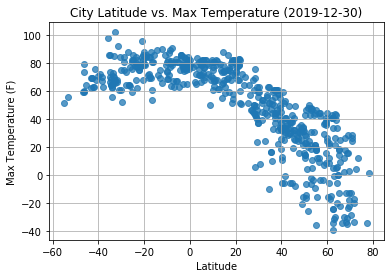

In [18]:
# Build a scatter plot to examine relationship between max temperature in farenheit and latitude
plt.scatter(weather_df["Latitude"],weather_df["Max Temp"], marker="o", alpha = 0.75)

# Add labels
plt.title("City Latitude vs. Max Temperature (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("Temp&Latitude.png")

# Show plot
plt.show()

# Comparing Humidity (%) & Latitude

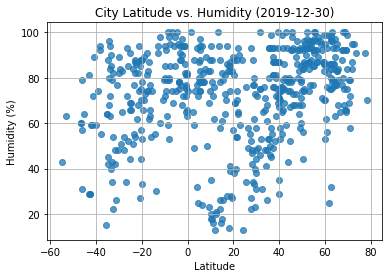

In [19]:
# Build a scatter plot to examine relatinship between humidty and latitude
plt.scatter(weather_df["Latitude"],weather_df["Humidity"], marker="o", alpha = 0.75)

# Add labels
plt.title("City Latitude vs. Humidity (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Humidity&Latitude.png")

# Show plot
plt.show()

# Comparing Cloudiness (%) & Latitude

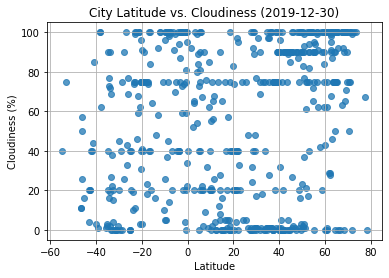

In [20]:
# Build a scatter plot to examine relationship between cloudiness and latitude
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"], marker="o", alpha = 0.75)

# Add labels
plt.title("City Latitude vs. Cloudiness (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness&Latitude.png")

# Show plot
plt.show()

# Comparing Wind Speed (mph) & Latitude

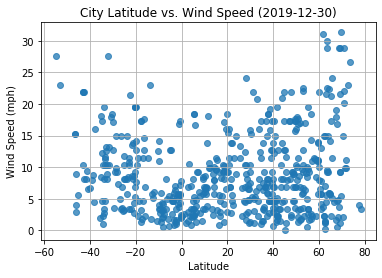

In [21]:
# Build a scatter plot to examine relationship between wind speed and latitude
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"], marker="o", alpha = 0.75)

# Add labels
plt.title("City Latitude vs. Wind Speed (" + tmpDate + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeed&Latitude.png")

# Show plot
plt.show()